# Pandas 자체 실습

- 인적 전문가 정보 데이터

artist         0
genre          0
location       1
ticket_sold    1
rating         1
dtype: int64
       ticket_sold    rating
count      5.00000  5.000000
mean      81.00000  4.325000
std       54.81788  0.349106
min        0.00000  3.900000
25%       60.00000  4.100000
50%       85.00000  4.325000
75%      120.00000  4.500000
max      140.00000  4.800000
genre
국악       60.0
뉴에이지      0.0
재즈       85.0
클래식     130.0
Name: ticket_sold, dtype: float64
location
대전    4.100
미정    4.325
부산    3.900
서울    4.650
Name: rating, dtype: float64


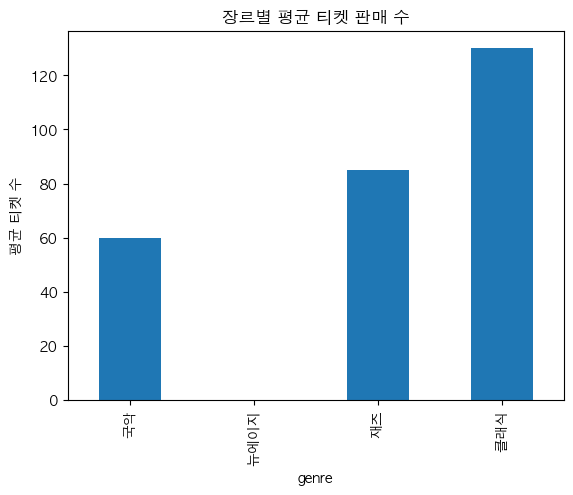

In [17]:
import pandas as pd
# 시각화 추가
import matplotlib.pyplot as plt
import matplotlib as mpl


# 경로 하드코딩
path = f'.'

# CSV 불러오기
df = pd.read_csv(f'{path}/expert_info_data.csv')
# df

# 1. 결측치 확인하기
print(df.isnull().sum())

# 2. 결측치 처리 - location/티켓 수
df['location'] = df['location'].fillna('미정')
df['ticket_sold'] = df['ticket_sold'].fillna(0)
df['rating'] = df['rating'].fillna(df['rating'].mean())

# 3. 요약 통계
print(df.describe())

# 4. 장르별 평균 티켓 판매 수
genre_group = df.groupby('genre')['ticket_sold'].mean()
print(genre_group)

# 5. 지역별 평균 평점
location_rating = df.groupby('location')['rating'].mean()
print(location_rating)




# 시각화 표시시 한글 깨짐 방지
# macOS 한글 폰트 설정 (Apple 시스템 기본 폰트 사용)
mpl.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호 깨짐 방지

# # Windows 한글 폰트 설정
# mpl.rc('font', family='Malgun Gothic')  # 또는 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False


# 장르별 티켓 판매 수 시각화
genre_group.plot(kind='bar', title='장르별 평균 티켓 판매 수')
plt.ylabel('평균 티켓 수')
plt.show()
